# Introduction to Support Vector Machines (SVM)

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                    n_redundant=0, n_classes=2,
                                    random_state=123)

In [3]:
X.shape, y.shape

((100, 2), (100,))

Text(0, 0.5, 'Y values')

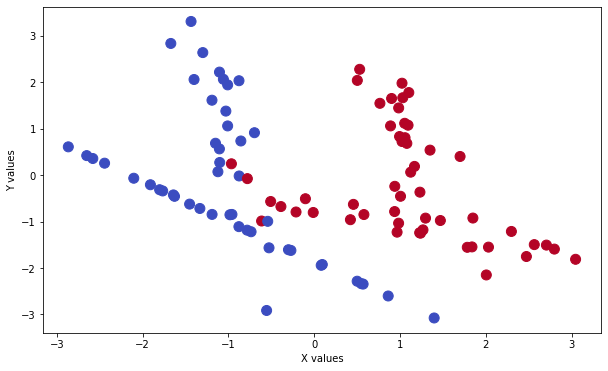

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm,s=100)
plt.xlabel('X values')
plt.ylabel('Y values')

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [6]:
from sklearn.svm import SVC

params = {'kernel':'linear'}
classifier = SVC(**params, gamma='auto')

In [7]:
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
predictions=classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[13  2]
 [ 3 12]]


In [10]:
metrics.accuracy_score(y_test, predictions)

0.8333333333333334

In [11]:
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.9)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=200)

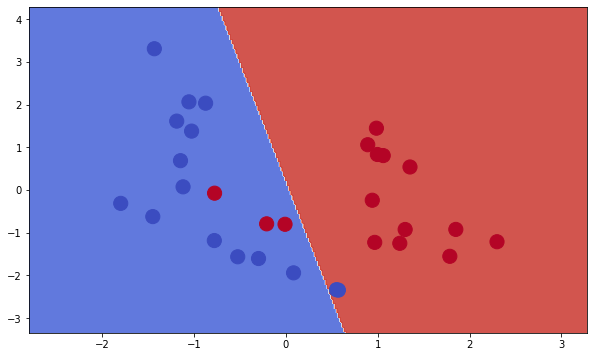

In [12]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

# Build a non-linear classifier using SVM

In [13]:
params = {'kernel':'rbf'}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
metrics.accuracy_score(y_test, predictions)

[[15  0]
 [ 1 14]]


0.9666666666666667

The accuracy increased to 95% when we use a non-linear classifier!

Since the data has only 2 features, it is easy to plot for visualization.

You can visualize the effect of a non-linear SVM classifier on our test dataset.

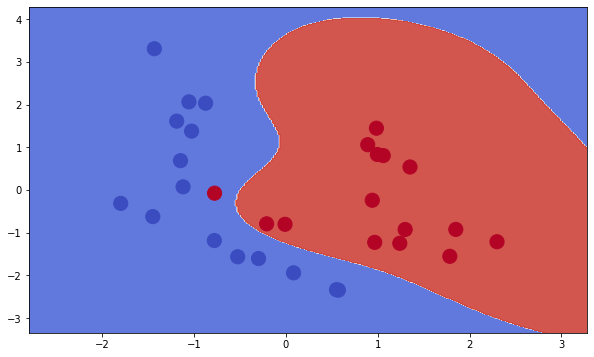

In [14]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

We can test out other non-linear SVM variants available by changing the SVM kernel and visualize the effect on our test dataset.

In [15]:
params = {'kernel':'poly','degree':3}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
metrics.accuracy_score(y_test, predictions)

[[13  2]
 [ 3 12]]


0.8333333333333334

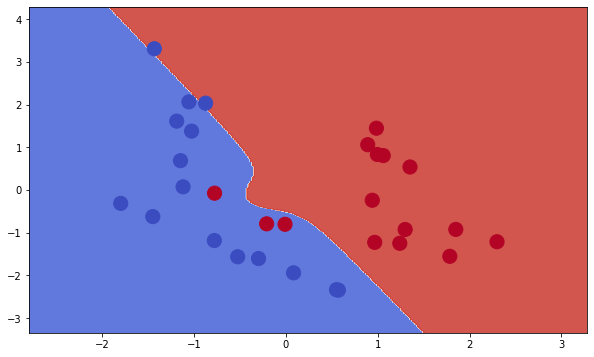

In [16]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

In [17]:
params = {'kernel':'sigmoid'}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
metrics.accuracy_score(y_test, predictions)

[[11  4]
 [ 3 12]]


0.7666666666666667

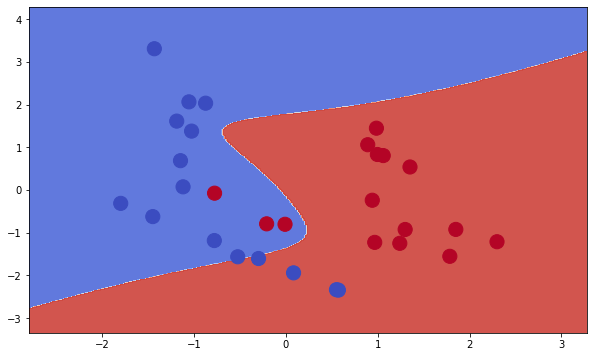

In [18]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(classifier, X_test, y_test)

# Classifying IRIS dataset by using Support Vector Machine

In [19]:
iris = datasets.load_iris()

In [20]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [21]:
iris.data.shape

(150, 4)

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
np.unique(iris.target)

array([0, 1, 2])

In [25]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
data = iris.data.astype(np.float32)
target = iris.target.astype(np.float32)

In [27]:
print(len(data))
print(len(target))

150
150


In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

In [29]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [30]:
X_test.shape, y_test.shape

((45, 4), (45,))

In [31]:
from sklearn.svm import SVC

params = {'kernel':'linear'}
classifier = SVC(**params, gamma='auto')

In [32]:
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
predictions=classifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]


In [35]:
metrics.accuracy_score(y_test, predictions)

0.9555555555555556

In [36]:
params = {'kernel':'poly','degree':3}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
metrics.accuracy_score(y_test, predictions)

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]


0.9777777777777777

In [37]:
params = {'kernel':'rbf'}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
metrics.accuracy_score(y_test, predictions)

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]


0.9777777777777777

In [38]:
params = {'kernel':'sigmoid'}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
metrics.accuracy_score(y_test, predictions)

[[ 0 18  0]
 [ 0 10  0]
 [ 0 17  0]]


0.2222222222222222

As you can see the rbf and polynomial kernels, slightly improve the accuracy score because the IRIS dataset that we use is almost linearly separable. Sigmoid kernel does not perform well for this dataset.